In [1]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.


# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
#plt.style.use('Solarize_Light2')

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

import scipy.stats as stats

# -----------------------------------------------------------------------
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene


In [2]:
definitivo =pd.read_csv("definitivo.csv",index_col=0)
#definitivo.head(2).T

In [3]:
definitivo.shape

(1080, 37)

In [4]:
definitivo["attrition"].value_counts()

No     903
Yes    177
Name: attrition, dtype: int64

In [5]:
abandono = definitivo[definitivo["attrition"]=="Yes"]
len(abandono)

177

In [6]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

In [7]:
definitivo["attrition_number"].value_counts()

0    903
1    177
Name: attrition_number, dtype: int64

In [8]:
abandono = {"grupo": ["Abandono","Empleados actuales"], "valores": [177,903]}
df_abandono = pd.DataFrame(abandono)
df_abandono

,grupo,valores
0,Abandono,177
1,Empleados actuales,903


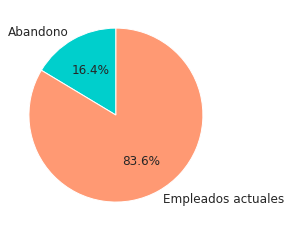

In [9]:
col_ab = ['#00CFCC', '#FF9973']
plt.pie("valores", labels = "grupo",
        data = df_abandono,  
        colors = col_ab,
        autopct=  '%1.1f%%',  
        textprops={'fontsize': 12}, 
        startangle=90);

In [10]:
empleado = definitivo[definitivo["attrition"]=="No"]
len(empleado)

903

<AxesSubplot:xlabel='yearsatcompany', ylabel='Count'>

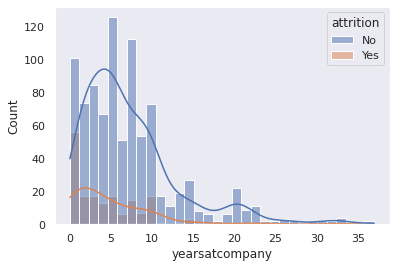

In [11]:
sns.histplot(data = definitivo, x = "yearsatcompany", hue = "attrition", kde = True, color= "blue")
# plt.title("Edad según rotación")
# plt.xlabel("Edad")
# plt.ylabel("Frecuencia")

In [12]:
abandono["yearsatcompany"].min()

KeyError: 'yearsatcompany'

In [ ]:
abandono["yearsatcompany"].max()

33

In [ ]:
empleado["yearsatcompany"].min()

0

In [ ]:
empleado["yearsatcompany"].max()

37

# Perfil de los que han dejado la empresa y actuales empleados

Text(0, 0.5, 'Frecuencia')

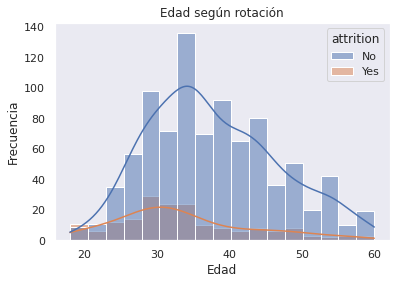

In [ ]:
sns.histplot(data = definitivo, x = "age", hue = "attrition", kde = True, color= "blue")
plt.title("Edad según rotación")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

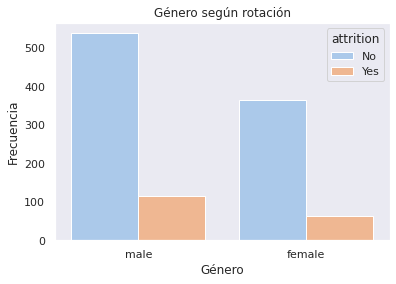

In [ ]:
sns.countplot(x='gender_cat', hue='attrition', data=definitivo, palette="pastel")
plt.title("Género según rotación")
plt.xlabel("Género")
plt.ylabel("Frecuencia");

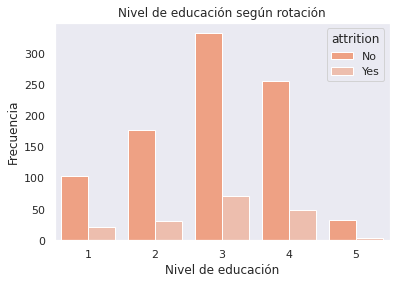

In [ ]:
col_ed = ['#FF9973', '#F7B9A4']
sns.countplot(x='education', hue='attrition', data=definitivo, palette=col_ed)
plt.title("Nivel de educación según rotación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia");

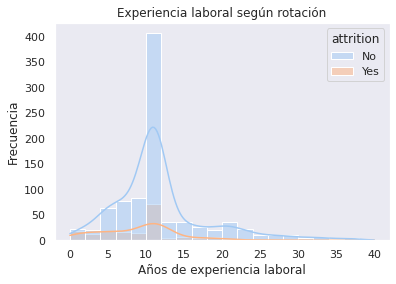

In [ ]:
col_exp = ['#00CFCC', '#355C7D']
sns.histplot(x='totalworkingyears', hue='attrition', bins = 20, kde = True, data=definitivo, palette="pastel")
plt.title("Experiencia laboral según rotación")
plt.xlabel("Años de experiencia laboral")
plt.ylabel("Frecuencia");

#En términos relativos, los que tienen poca experiencia (cerca de 0 años de experiencia), tienden a abandonar la empres, mientras que aquellos que tienen más experiencia tienden a quedarse

In [ ]:
definitivo["maritalstatus"].value_counts()

Unknown     426
married     288
single      234
divorced    132
Name: maritalstatus, dtype: int64

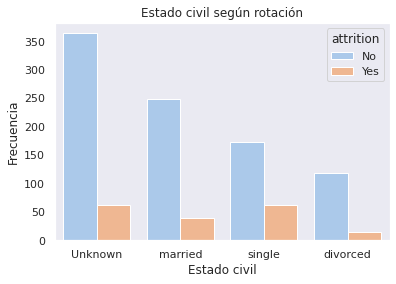

In [ ]:
sns.countplot(x='maritalstatus', hue='attrition', data=definitivo, palette="pastel")
plt.title("Estado civil según rotación")
plt.xlabel("Estado civil")
plt.ylabel("Frecuencia");

## Relación entre satisfacción laboral y la rotación

In [ ]:
definitivo["group"] = np.where(definitivo["jobsatisfaction"] >= 3, "control", "variante")
definitivo["group"].value_counts()

control     665
variante    415
Name: group, dtype: int64

In [ ]:
df_control = definitivo[definitivo["jobsatisfaction"] >= 3]
df_variante = definitivo[definitivo["jobsatisfaction"] < 3]
print(len(df_control))
print(len(df_variante))


665
415


In [ ]:
# Paso2. Cálculo de la tasa de rotación

# Tasa de rotación en grupo de control
df_control_rotacion = df_control[df_control["attrition"] == "Yes"]
tasa_rotacion_control = df_control_rotacion.shape[0] / df_control.shape[0]
print(f"la tasa de rotación del grupo de control es:{tasa_rotacion_control}")

# Tasa de rotación en grupo variante
df_variante_rotacion = df_variante[df_variante["attrition"] == "Yes"]
tasa_rotacion_variante = df_variante_rotacion.shape[0] / df_variante.shape[0]
print(f"la tasa de rotación del grupo variante es:{tasa_rotacion_variante}")

la tasa de rotación del grupo de control es:0.14135338345864662
la tasa de rotación del grupo variante es:0.2


Text(0, 0.5, 'Frecuencia')

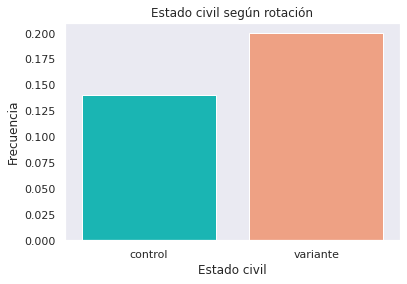

In [ ]:
# Gráfico para visualizar la diferencia en la tasa de rotación

# 1. De las tasas de conversión, creo un dataframe
rota = {"grupo":["control", "variante"], "tasa_rotacion": [0.14, 0.2]}
df_rotacion = pd.DataFrame(rota)

#2. Gráfica deacuerdo al df_rotacion
col_rota = ["#00CFCC", "#FF9973"]
sns.barplot(x="grupo", y="tasa_rotacion", data=df_rotacion, palette = col_rota)
plt.title("Tasa de rotación");

plt.title("Estado civil según rotación")
plt.xlabel("Estado civil")
plt.ylabel("Frecuencia")

Interpretación: La tasa de rotación es mayor en el grupo variante (aquellos con un nivel de satisfacción bajo = 1 ó 2)

In [ ]:
#Paso 3. DUDAAAA Análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos de control y variante

#1. Tabla de contingencia
contingency_table = pd.crosstab(df_rotacion["grupo"], df_rotacion['tasa_rotacion'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          """)

1.0
No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.

 ---------- 

 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          


In [ ]:
# Paso 5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

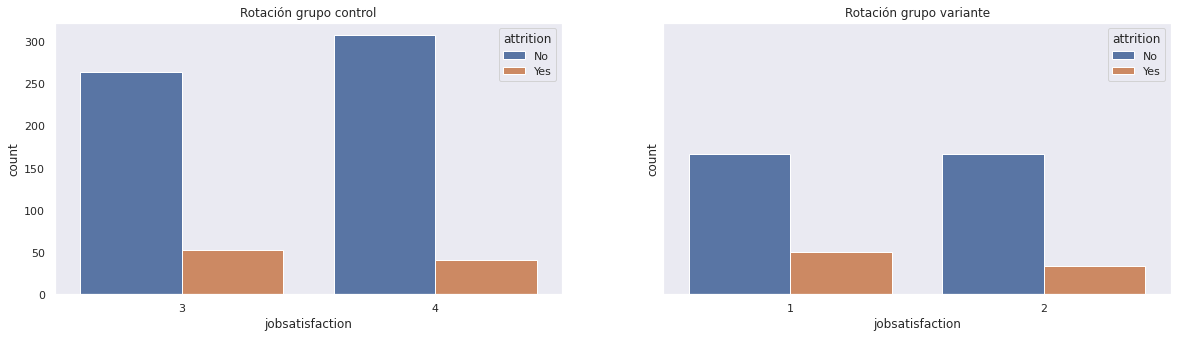

In [ ]:
# REPRESENTACIÓN VISUAL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)

#---Opción1------

# Gráfico 1: Rotación del grupo control
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_control, ax=axes[0])
axes[0].set_title("Rotación grupo control")

# Gráfico 2: Rotación del grupo variante
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_variante, ax=axes[1])
axes[1].set_title("Rotación grupo variante");


In [ ]:
# ----- OPCIÓN 2 -----
#Gráfico 2 para mejor visualización entre ambos grupos

# Para q se vea mejor la diferencia entre el grupo de control y media, creamos una columna (es lo mismo que el filtrado hecho anteriormente entre grupo de control y variante pero esta vez en una nueva columna


Interpretación de los gráficos: Visualmente, la rotación es mayor en el grupo variante (aquellos con un nivel de satisfacción más bajo (1 y 2)) q en el control (donde el nivel de satisfacción es más alto (3 y 4))

In [ ]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance', 'group'],
      dtype='object')

In [ ]:
# Análisis estadístico para calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo
#--> Verificamos: Normalidad; Homogeneidad de Varianzas e Independencia

In [ ]:
#A. NORMALIDAD (con Shapiro)

def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(definitivo, "attrition_number")

Para la columna attrition_number los datos no siguen una distribución normal.


In [ ]:
#Puesto que nuestra métrica (attrition) no sigue una distribución normal, hacemos la prueba de ManWhitney 

#1. Filtramos el conjunto de datos para quedarnos con la métrica q queremos valorar
rotacion_control = df_control["attrition_number"]
rotacion_variante = df_variante["attrition_number"]
print(len(rotacion_control))
print(len(rotacion_variante))

#2. Realizamos la prueba de ManWhitney para calcular el pvalor
statistic, pvalue = mannwhitneyu(rotacion_control, rotacion_variante)
print(f"El pvalor de rotación es {pvalue}") 

if pvalue < 0.05:
    print("Para la métrica rotación, las medias son diferentes.")
else:
    print("Para la métrica rotación, las medias son iguales.")

665
415
El pvalor de rotación es 0.011366403739309406
Para la métrica rotación, las medias son diferentes.


Interpretación del pvalor: Puesto que este pvalor es inferior a 0.05 podemos afirmar que existe una diferencia significativa entre las medias y por tanto podemos rechazar la hipótesis nula de que no existe una relación entre la rotación y el nivel de satisfacción. 
Conclusión: Existe una relación significativa entre el nivel de satisfacción y el abandono. 

In [ ]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance', 'group'],
      dtype='object')

<AxesSubplot:xlabel='jobsatisfaction', ylabel='attrition_number'>

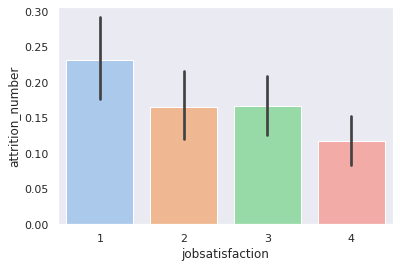

In [ ]:
sns.barplot(x ="jobsatisfaction", y = "attrition_number", data = definitivo, palette = "pastel")

Text(0, 0.5, 'Abandono')

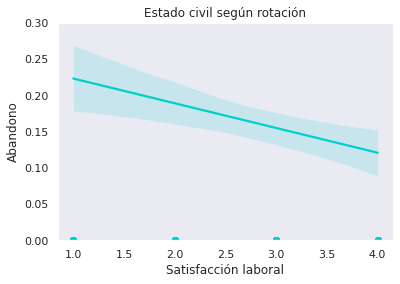

In [ ]:
sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = definitivo, color = "#00CFCC")
# Establecer límites en el eje y para acortar el rango de valores
plt.ylim(0, 0.3)
plt.title("Estado civil según rotación")
plt.xlabel("Satisfacción laboral")
plt.ylabel("Abandono")
#plt.title("Relación entre satisfacción laboral y abandono para ambos grupos");

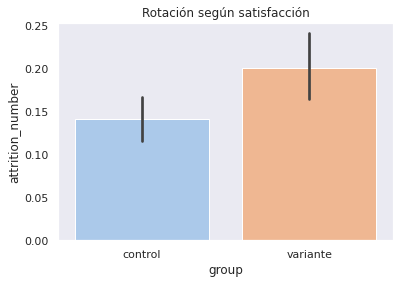

In [15]:
# ----- OPCIÓN 2 -----
#Gráfico 2 para mejor visualización entre ambos grupos

#1. Creamos una columna con la división de los grupos por satisfacción
definitivo["group"] = np.where(definitivo["jobsatisfaction"] >= 3, "control", "variante")

# Para q se vea mejor la diferencia entre el grupo de control y media, creamos una columna (es lo mismo que el filtrado hecho anteriormente entre grupo de control y variante pero esta vez en una nueva columna
definitivo["group"].value_counts()
sns.barplot(x="group", y="attrition_number", data=definitivo, palette="pastel")
plt.title("Rotación según satisfacción");

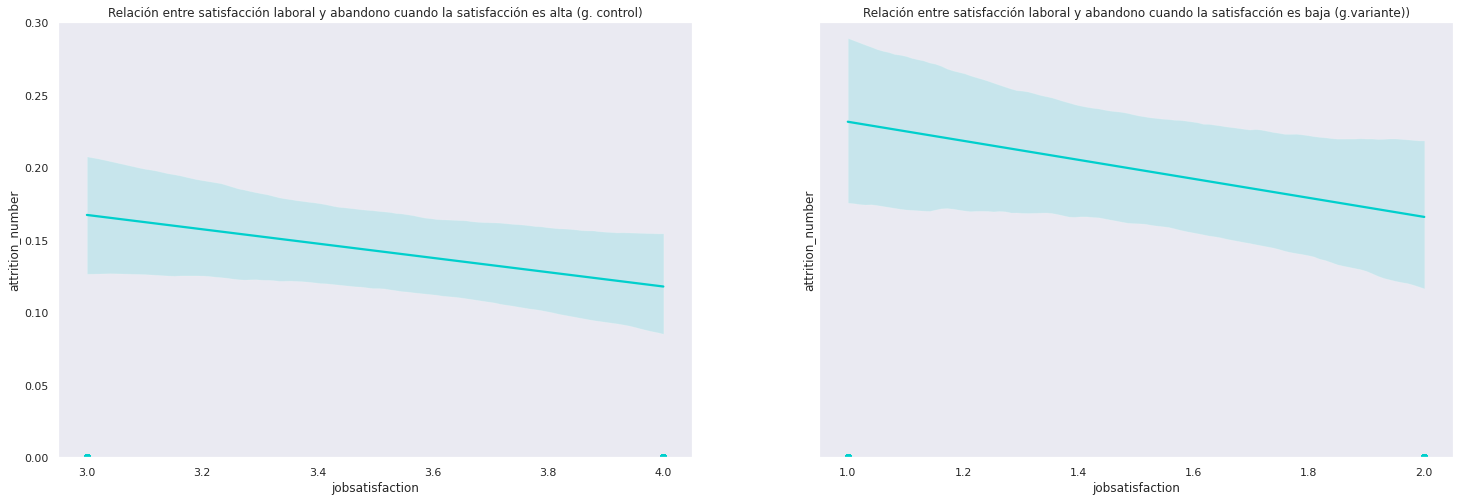

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8),sharey=True)

sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = df_control, color = "#00CFCC", ax=axes[0])
plt.ylim(0, 0.3)
axes[0].set_title("Relación entre satisfacción laboral y abandono cuando la satisfacción es alta (g. control)");

sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = df_variante, color = "#00CFCC", ax=axes[1])
axes[1].set_title("Relación entre satisfacción laboral y abandono cuando la satisfacción es baja (g.variante))");

In [ ]:
### DUDAAAA 

# Este para comparar el grupo de control y variante de aquellos q han abandonado la empresa (attrition = 1)
grupo1_abandono = df_control[df_control["attrition_number"] == 1]
grupo2_abandono = df_variante[df_variante["attrition_number"] == 1]
print(grupo1_abandono["attrition_number"].value_counts())
print(grupo2_abandono["attrition_number"].value_counts())
print("--------------------")

#--------------------Cálculo de Manwhitneyu-------------------
#1.Filtramos por nuestra mética en cada uno de los grupos de arriba
uno = grupo1_abandono["attrition_number"]
dos = grupo2_abandono["attrition_number"] 
#2. Calculamos el pvalor
statistic, pvalue = mannwhitneyu(uno, dos)
pvalue #Este p-value nos indica que existe una relación significativa entre el nivel de satisfacción y el abandono. Para aquellos individuos que abandonaron la empresa (attrition = 1) la satisfacción laboral fue un elemento importante
print (f"Cálculo de Manwhitneyu: {pvalue}")

1    94
Name: attrition_number, dtype: int64
1    83
Name: attrition_number, dtype: int64
--------------------
Cálculo de Manwhitneyu: 1.0


In [ ]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance', 'group'],
      dtype='object')

# Relación con otras variables

In [ ]:
definitivo["joblevel"]

0       5
1       5
2       5
5       4
6       3
       ..
1605    1
1606    2
1608    2
1610    2
1613    3
Name: joblevel, Length: 1080, dtype: int64

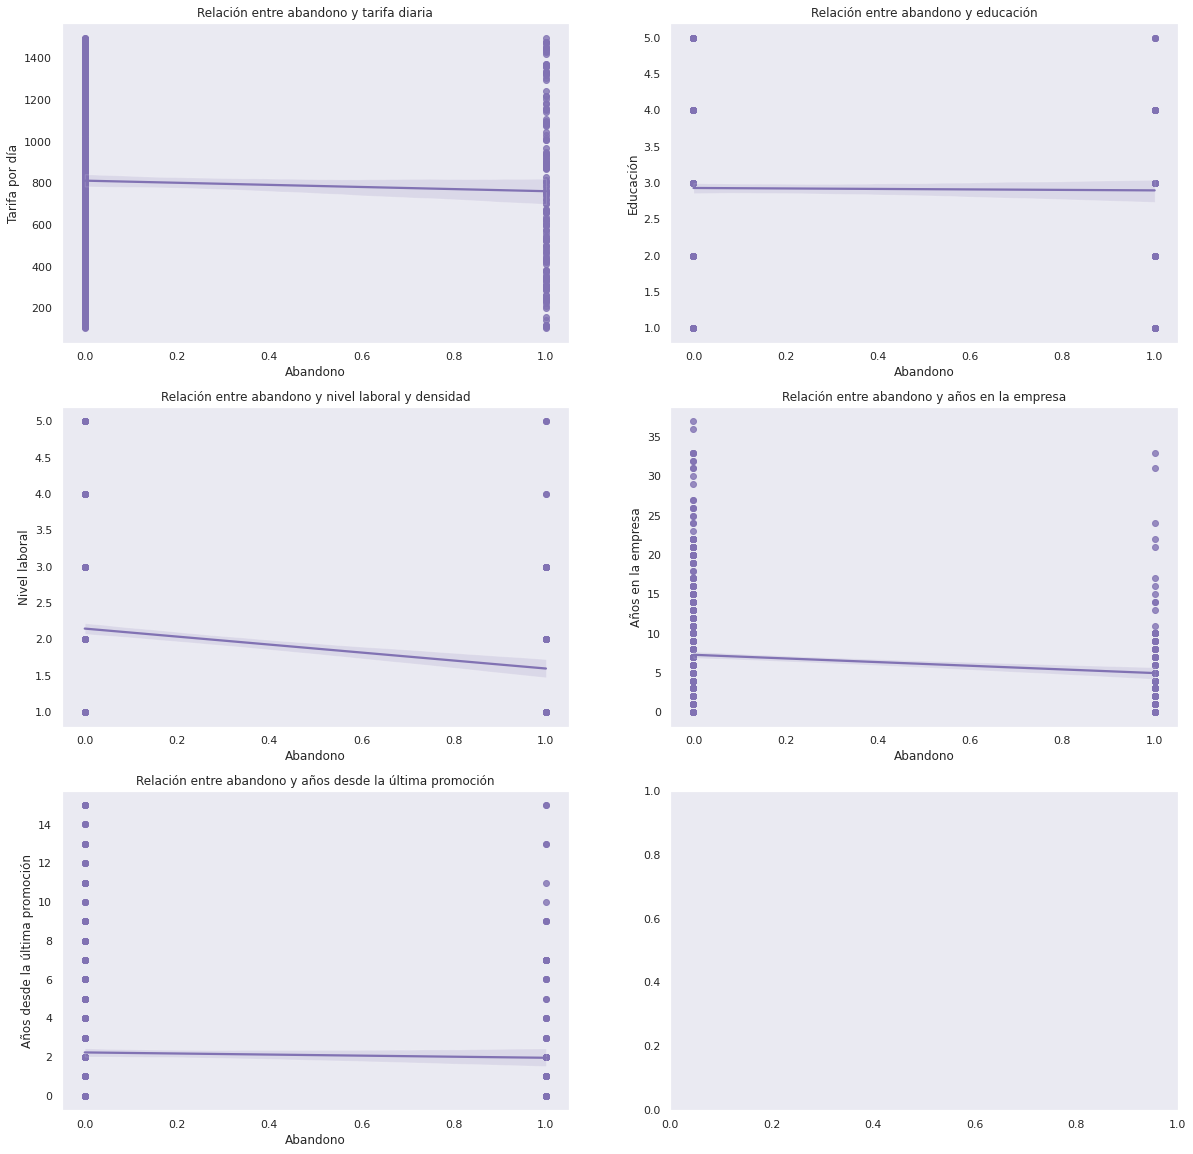

In [ ]:
lista = ["dailyrate", "education", "joblevel", "yearsatcompany", "yearssincelastpromotion"]
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
axes = axes.flat

for indice, elemento in enumerate(lista):
    sns.regplot(x ="attrition_number", y = elemento, data = definitivo, ax = axes[indice], color= "m")
    
    # Establece la etiqueta del eje x
    axes[indice].set_xlabel("Abandono")

    # Establece la etiqueta del eje y de cada gráfica
    axes[0].set_ylabel("Tarifa por día")
    axes[1].set_ylabel("Educación")
    axes[2].set_ylabel("Nivel laboral")
    axes[3].set_ylabel("Años en la empresa")
    axes[4].set_ylabel("Años desde la última promoción")

    
    #Establecemos los títulos de cada gráfica
    axes[0].set_title("Relación entre abandono y tarifa diaria")
    axes[1].set_title("Relación entre abandono y educación")
    axes[2].set_title("Relación entre abandono y nivel laboral y densidad")
    axes[3].set_title("Relación entre abandono y años en la empresa")
    axes[4].set_title("Relación entre abandono y años desde la última promoción");

## 7. Análisis de registros para el mismo empleado (con el mismo employee number)

In [ ]:
definitivo["employeenumber"].duplicated().sum()

In [ ]:
duplicados = definitivo[definitivo["employeenumber"].duplicated(keep=False)].sort_values("employeenumber", ascending=False)

In [ ]:
#Sacamos los duplicados de un empleado determinado
duplicados[duplicados["employeenumber"] == 1947.0]

In [ ]:
#Aquí estamos sacando los valores de arriba q son 2 listas, una para cada registro
duplicados[duplicados["employeenumber"] == 1947.0].values

In [ ]:
#valores del primero
# print(duplicados[duplicados["employeenumber"] == 1947.0].values[0])

# #valores del segundo
# print(duplicados[duplicados["employeenumber"] == 1947.0].values[1])

In [ ]:
#Hacemos un zip de los valores de ambos registros para el mismo empleado (en este ejemploo para el empleado con employeenumber = 1947)
resultado_zip_ej = list(zip(definitivo.columns, duplicados[duplicados["employeenumber"] == 1947.0].values[0], duplicados[duplicados["employeenumber"] == 1947.0].values[1]))
resultado_zip_ej[:4]

In [ ]:
len(resultado_zip_ej) #Esto son todas las columnas

In [ ]:
#Obtenemos la lista del employeenumber de aquellos empleados repetidos
lista_emplo_num = duplicados["employeenumber"].unique()
lista_emplo_num[:3]

In [ ]:
#Creamos el zip para cada uno de los employeenumbers en nuestra "lista_emplo_num" 
dicc_cambia = {"empleado": [], "col_cambia":[]}

for empleado in lista_emplo_num[:-1]: #itermos por cada uno de los códigos en nuestra lista excepto por el último que es "nan"
    resultado_zip = list(zip(definitivo.columns, duplicados[duplicados["employeenumber"] == empleado].values[0], duplicados[duplicados["employeenumber"] == empleado].values[1]))
    
    for tupla in resultado_zip:
        if tupla[1] != tupla[2]:
            print(empleado)
            dicc_cambia["empleado"].append(empleado)
            print(tupla[0])
            dicc_cambia["col_cambia"].append(tupla[0])
            print("....")

In [ ]:
df_resumen = pd.DataFrame(dicc_cambia)
df_resumen.sort_values("empleado")

In [ ]:
empleados_2mascambios = df_resumen[df_resumen["empleado"].duplicated(keep=False)].sort_values("empleado", ascending=True)
len(empleados_2mascambios)

In [ ]:
len(empleados_2mascambios["empleado"].unique()) #tenemos 27 empleados cuyas condiciones han cambiado +2

In [ ]:
len(df_resumen["empleado"].unique()) #Para 72 empleados ha cambiado alguna de las variables medidas

In [ ]:
df_resumen["col_cambia"].unique()

In [ ]:
df_resumen["col_cambia"].value_counts()

In [ ]:
df_resumen[df_resumen["col_cambia"]=="remotework"]

In [ ]:
len(resultado_zip)

# 8. Recomendaciones

- Añadir info sobre el número de hijos, respetando la privacidad del empleado
- Añadir información completa sobre "monthly income" - solamente disponíamos del 48% de los datos
- Incluir la fecha de la obtención de los datos (cuando se hace la encuesta) - Algunos empleados aparecen 2 veces (no sabemos cuál es el último insertado)


# 9. Next steps
1. Hacer un análisis sobre el cambio en la situación sobre el abandono y cambios en la satisfacción de los empleados deacuerdo al cambio en sus circunstancias. Hemos observado que en la base de datos original, había registros para el mismo empleado cuya situación ha cambiado -  Análisis sobre qué factores afectan más en la satisfacción y la rotación de los empleados de acuerdo a este grupo